# 패션 이미지 데이터(10가지)를 분류 

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

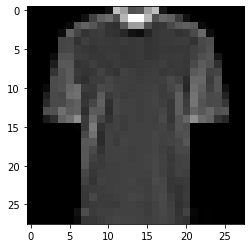

In [6]:
plt.imshow(X_train[59998], cmap='gray')
# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap = 'gray' : 이미지를 흑백으로 전환시켜주는 명령

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
# y_train, y_test를 원핫인코딩 하기!
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train_one_hot.shape

(60000, 10)

#### 과대적합을 확인하기 위해 train데이터에서 검증셋을 분리해서 학습시 같이 출력시켜보자!

In [12]:
# 무조건 train, test, 셋만 나눠주는게 아니라 데이터를 일정 비율로 나누어주는 명령
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train,
                                                                 y_train_one_hot,
                                                                 random_state=3)

In [14]:
print(X_train.shape)
print(X_val.shape)                   # 검증용 문제
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)           # 검증용 정답

(45000, 28, 28)
(15000, 28, 28)
(45000, 10)
(15000, 10)


### 신경망 설계

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈


In [18]:
model = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model.add(Flatten(input_shape=(28,28)))

# 중간층
model.add(Dense(450, activation="sigmoid")) # 하나의 층
model.add(Dense(200, activation="sigmoid")) # 하나의 층
model.add(Dense(100, activation="sigmoid")) # 하나의 층
model.add(Dense(50, activation="sigmoid")) # 하나의 층

model.add(Dense(10, activation="softmax")) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 450)               353250    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               90200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 469,110
Trainable params: 469,110
Non-trainable params: 0
________________________________________________

In [20]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="categorical_crossentropy",  
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [25]:
h1 = model.fit(X_train,y_train_one_hot,
              epochs=50,  # epochs : 학습 횟수를 설정
              validation_data = (X_val, y_val_one_hot), # 검증용 데이터셋을 추가해주는 명령
              batch_size=32) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 3s 76us/sample - loss: 0.6395 - acc: 0.7489 - val_loss: 0.6383 - val_acc: 0.7505
Epoch 2/50
45000/45000 [==============================] - 4s 79us/sample - loss: 0.6431 - acc: 0.7452 - val_loss: 0.6626 - val_acc: 0.7249
Epoch 3/50
45000/45000 [==============================] - 4s 80us/sample - loss: 0.6577 - acc: 0.7337 - val_loss: 0.6417 - val_acc: 0.7422
Epoch 4/50
45000/45000 [==============================] - 4s 78us/sample - loss: 0.6282 - acc: 0.7521 - val_loss: 0.6305 - val_acc: 0.7555
Epoch 5/50
45000/45000 [==============================] - 3s 77us/sample - loss: 0.6280 - acc: 0.7603 - val_loss: 0.6456 - val_acc: 0.7507
Epoch 6/50
45000/45000 [==============================] - 3s 77us/sample - loss: 0.6219 - acc: 0.7586 - val_loss: 0.5909 - val_acc: 0.7743
Epoch 7/50
45000/45000 [==============================] - 4s 78us/sample - loss: 0.6228 - acc: 0.7549 - val_loss: 0.

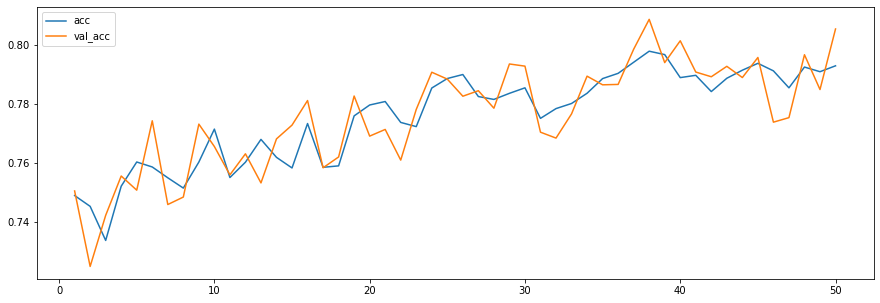

In [26]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['acc'],
        label = 'acc'
        )

plt.plot(range(1,51),
        h1.history['val_acc'],
        label = 'val_acc'
        )
plt.legend()
plt.show()

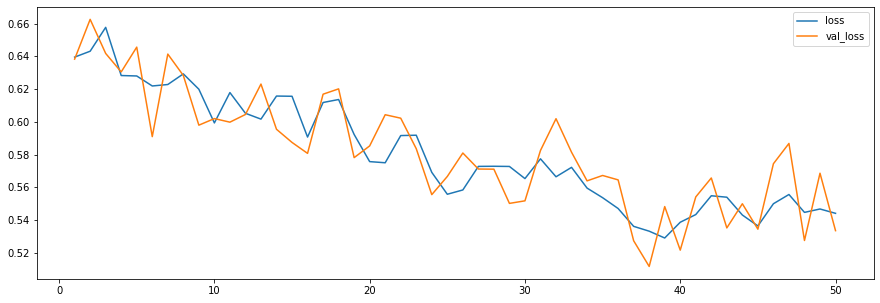

In [27]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['loss'],
        label = 'loss'
        )

plt.plot(range(1,51),
        h1.history['val_loss'],
        label = 'val_loss'
        )
plt.legend()
plt.show()

In [28]:
model.evaluate(X_test , y_test_one_hot)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.5594 - acc: 0.7961


[0.5593796637296676, 0.7961]